In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns" , 200)

In [4]:
data = pd.read_csv("Listings.csv",  encoding='ISO-8859-1', low_memory = False, parse_dates = ["host_since"])

In [5]:
data.head(10)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,4898654,NEW - Charming apartment Le Marais,505535,2011-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Temple,NaN,Paris,48.86428,2.35370,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Wa...",95,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,6021700,2P - Entre Bastille et Republique,8053690,2013-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86384,2.37101,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""TV"", ""Kitchen"", ""Washer"", ""Smoke ...",80,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,6945740,57sqm btw. Bastille & PÃÂ¨re Lachaise,5924709,2013-04-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Popincourt,NaN,Paris,48.86043,2.37842,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Wa...",59,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,7491966,Charming appartment near the Parc Buttes Chaumont,35812762,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Chaumont,NaN,Paris,48.87871,2.37489,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Heat...",80,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,7849932,Bel appartement plein de charme !,20833291,2014-09-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Opera,NaN,Paris,48.87790,2.33122,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Iron"", ""Kitchen"", ""Essentia...",90,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [7]:
data.shape

(279712, 33)

In [8]:
data.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [9]:
data["host_since"] = pd.to_datetime(data["host_since"])

In [10]:
data["city"].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [11]:
df = data.query('city == "Paris"')[["host_since","neighbourhood","city","accommodates","price"]].copy()

In [12]:
df.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [13]:
df[df["host_since"].isna() == 1]

,host_since,neighbourhood,city,accommodates,price
52879,NaT,Enclos-St-Laurent,Paris,2,57
52880,NaT,Enclos-St-Laurent,Paris,2,58
52881,NaT,Batignolles-Monceau,Paris,4,90
52882,NaT,Buttes-Montmartre,Paris,5,89
52883,NaT,Hotel-de-Ville,Paris,2,119
52884,NaT,Buttes-Montmartre,Paris,4,50
52885,NaT,Enclos-St-Laurent,Paris,6,220
52886,NaT,Popincourt,Paris,2,45
52887,NaT,Popincourt,Paris,4,100
52888,NaT,Menilmontant,Paris,2,50


In [14]:
df = df.dropna(subset=["host_since"])

In [15]:
df.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [16]:
df.tail(20)

,host_since,neighbourhood,city,accommodates,price
279692,2019-05-03,Buttes-Chaumont,Paris,2,80
279693,2015-04-03,Vaugirard,Paris,2,90
279694,2013-05-31,Menilmontant,Paris,2,80
279695,2016-04-22,Observatoire,Paris,2,65
279696,2011-03-14,Menilmontant,Paris,2,80
279697,2018-12-23,Menilmontant,Paris,2,75
279698,2019-06-09,Passy,Paris,2,180
279699,2016-04-18,Opera,Paris,2,85
279700,2016-08-06,Menilmontant,Paris,2,80
279701,2014-04-16,Buttes-Montmartre,Paris,2,120


In [17]:
df.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [18]:
df.loc[df["price"]== 0].count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [19]:
df_neighbourhood = df.groupby("neighbourhood")[["price"]].mean().sort_values("price")

In [20]:
df_neighbourhood

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955
Gobelins,98.110184
Observatoire,101.873591
Batignolles-Monceau,102.615616
Enclos-St-Laurent,102.988752


In [21]:
df_accommodates = df.query('neighbourhood == "Elysee"').groupby("accommodates").agg({"price" : "mean"}).sort_values("price")


In [22]:
df_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [23]:
df["year"]= df["host_since"].astype(str).str.split("-").str.get(0)

In [24]:
df.groupby("year").agg({"price":"mean"})

,price
year,
2008,77.750000
2009,159.641509
2010,125.031250
2011,124.828230
2012,111.578615
2013,107.096414
2014,100.253800
2015,103.646250
2016,114.159847


In [71]:
# Second solution
df_over_time = df.set_index("host_since").resample("YE").agg({"price":"mean","neighbourhood" : "count"})

In [72]:
df_over_time

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592
2013-12-31,107.096414,8142
2014-12-31,100.253800,10922
2015-12-31,103.646250,12147
2016-12-31,114.159847,8871


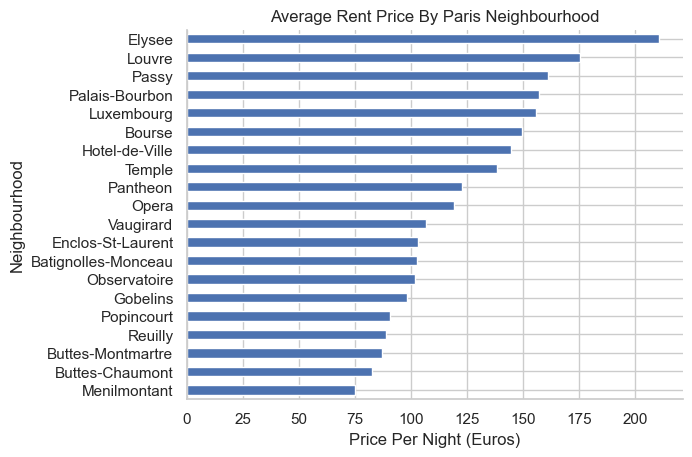

In [45]:
df_neighbourhood.plot.barh(title= "Average Rent Price By Paris Neighbourhood", xlabel = "Price Per Night (Euros)", ylabel = "Neighbourhood",  legend = None)
sns.despine()

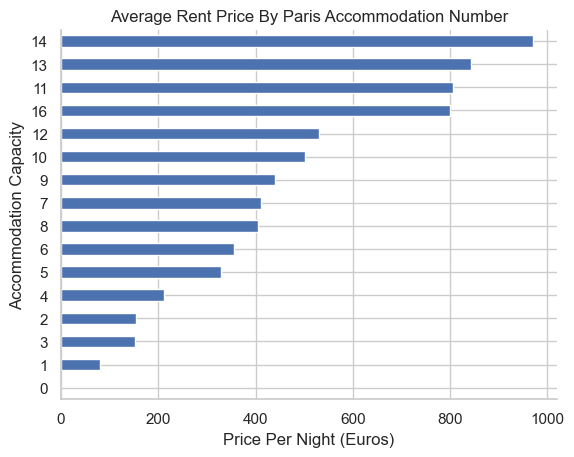

In [49]:
df_accommodates.plot.barh(title= "Average Rent Price By Paris Accommodation Number", xlabel = "Price Per Night (Euros)", ylabel = "Accommodation Capacity",  legend = None)
sns.despine()

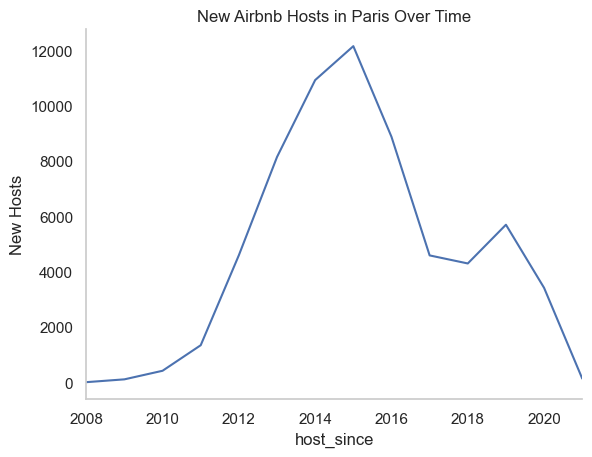

In [112]:
ax = df_over_time["neighbourhood"].plot(ylabel= "New Hosts", title= "New Airbnb Hosts in Paris Over Time")
ax.grid(False)
sns.despine()

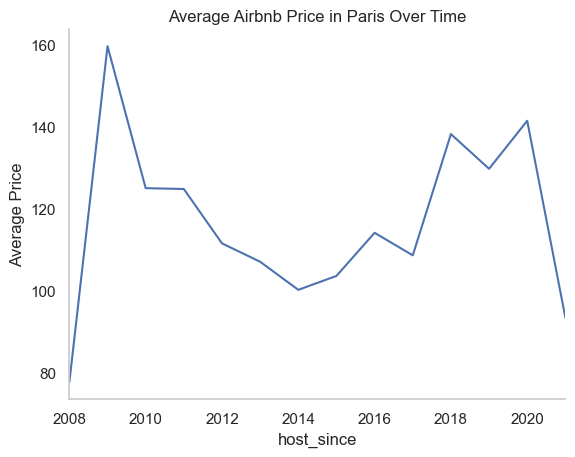

In [109]:
ax = df_over_time["price"].plot(ylabel= "Average Price", title= "Average Airbnb Price in Paris Over Time")
ax.grid(False)
sns.despine()

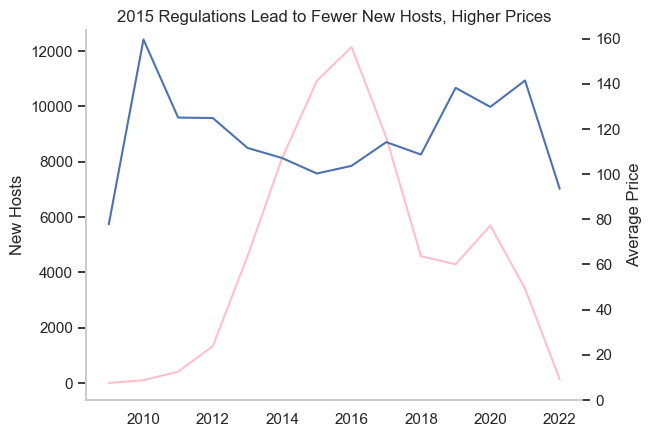

In [108]:
fig, ax = plt.subplots()

ax.plot(
    df_over_time.index,
    df_over_time["neighbourhood"],
    label = "New Hosts",
    c = "pink"
)
ax.set_ylabel("New Hosts")
ax2= ax.twinx()

ax2.plot(
    df_over_time.index,
    df_over_time["price"],
    label = "Average Price",
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")
ax.grid(False)
ax2.grid(False)




sns.despine()